In [2]:
import random
import torch
import matplotlib.pyplot as plt
import numpy as np

from Visualizations import visualize_one_sample, plot_pansharpen_examples
from models.PansharpeningUnetppLightning import PanSharpenUnetppLightning
from SentinelData import SentinelCroppedDataset

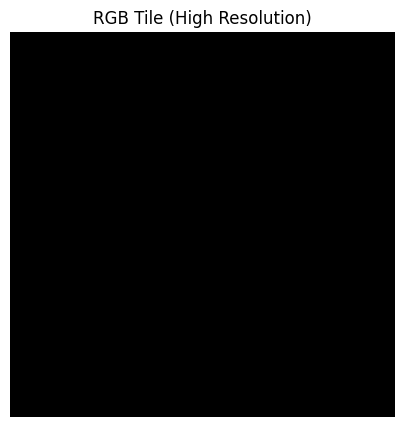

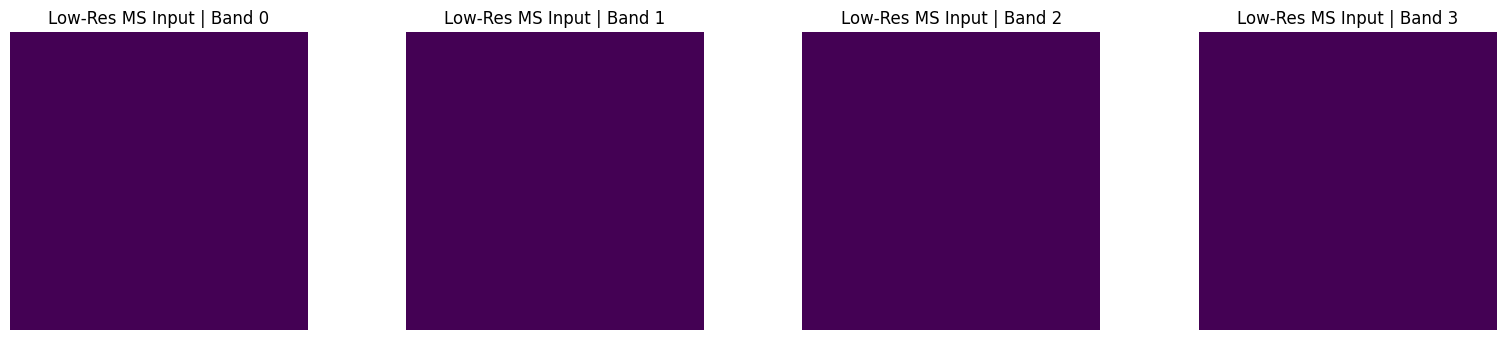

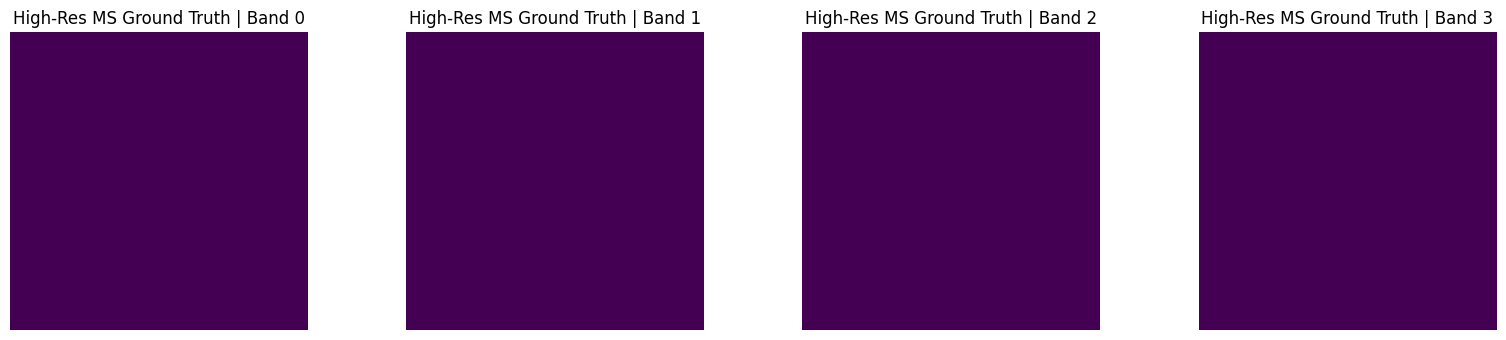

Displayed sample tiles from: val loader.


In [13]:
visualize_one_sample(
        data_path="./dataset_sentinel/",
        loader_type="val",    # or "val" or "test"
    )

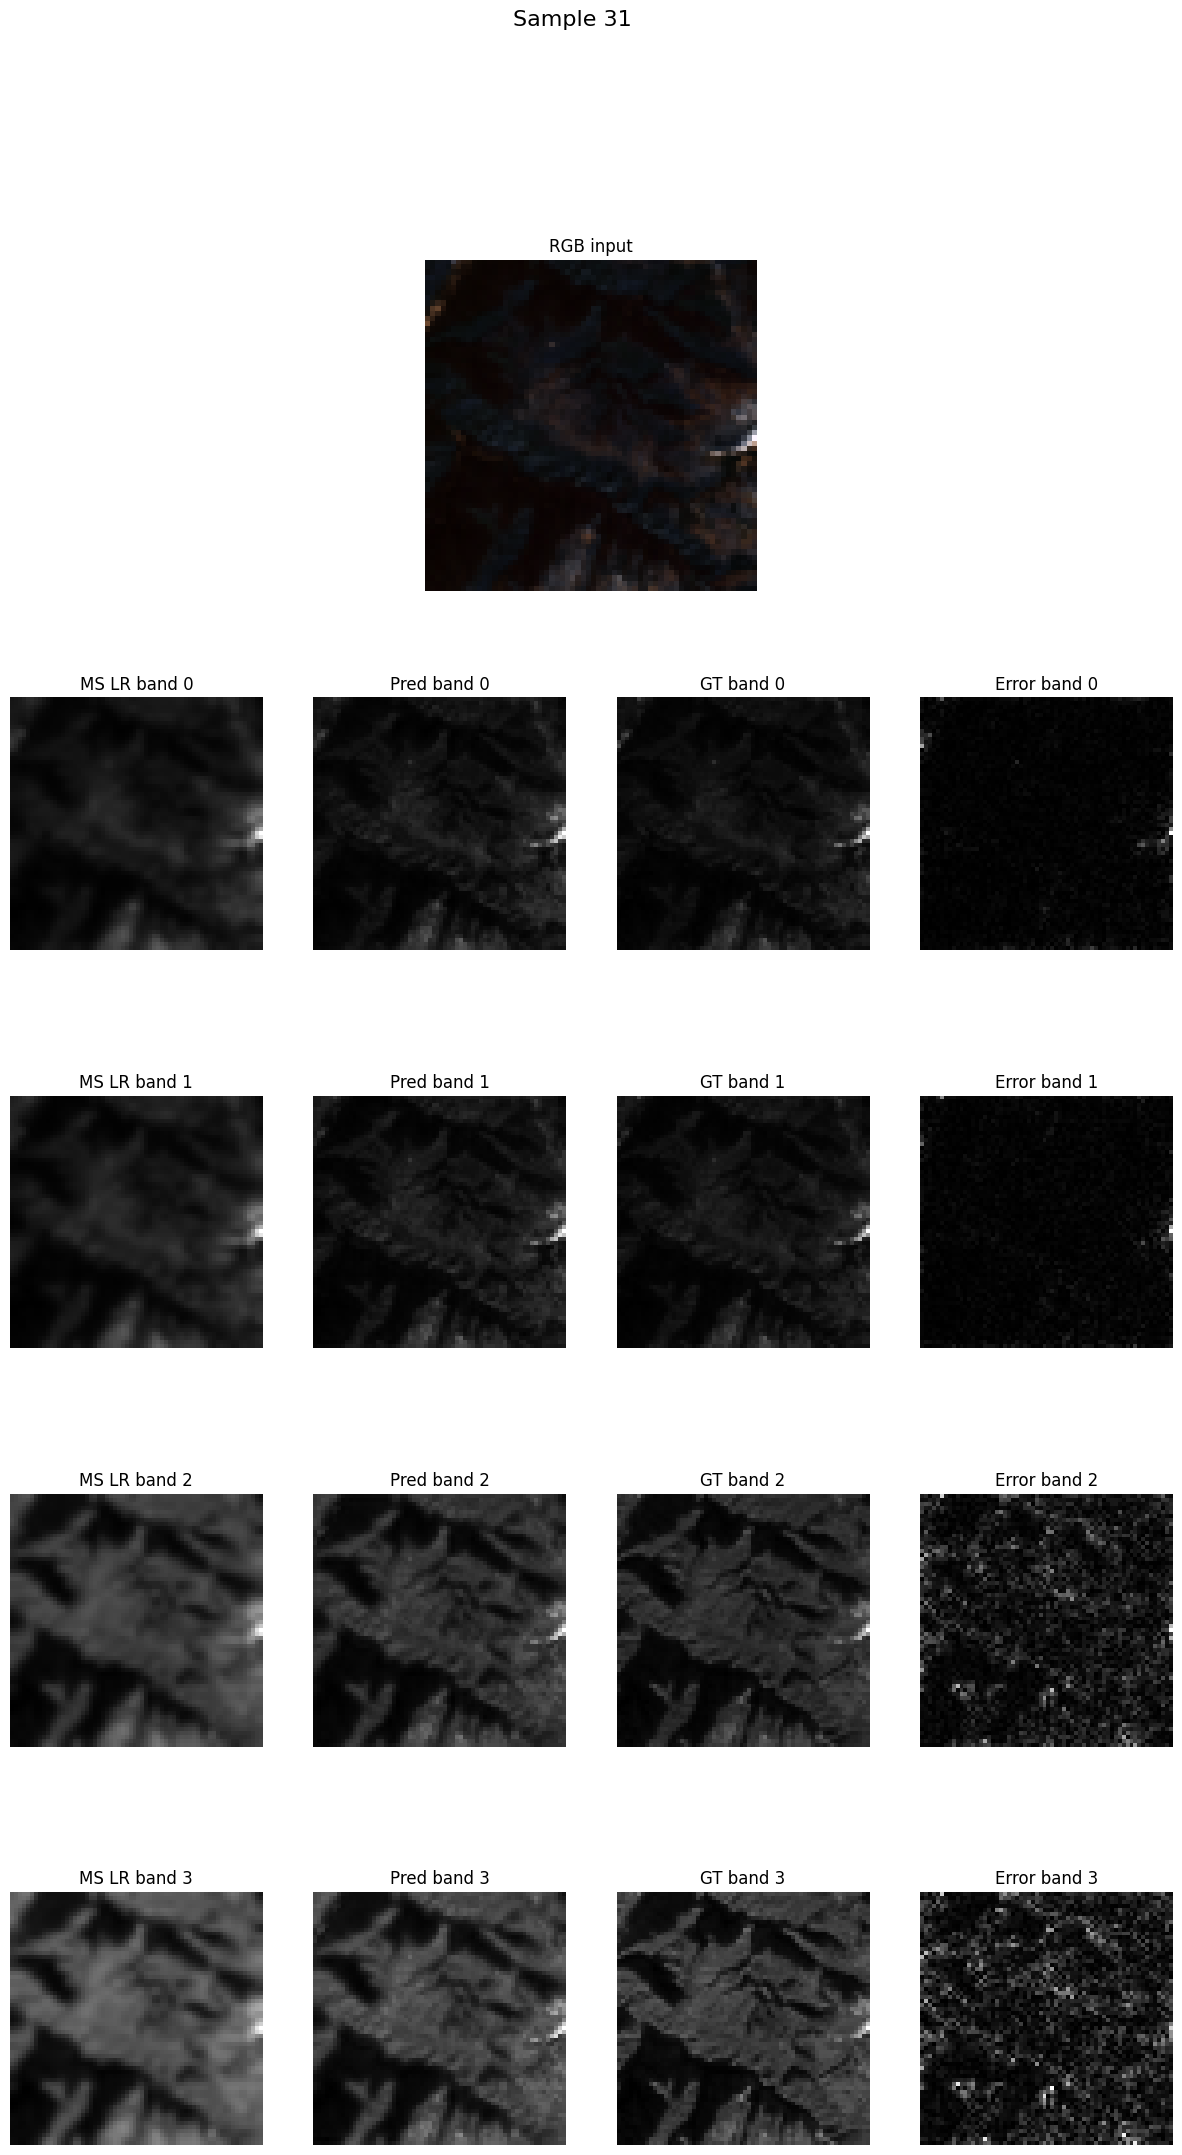

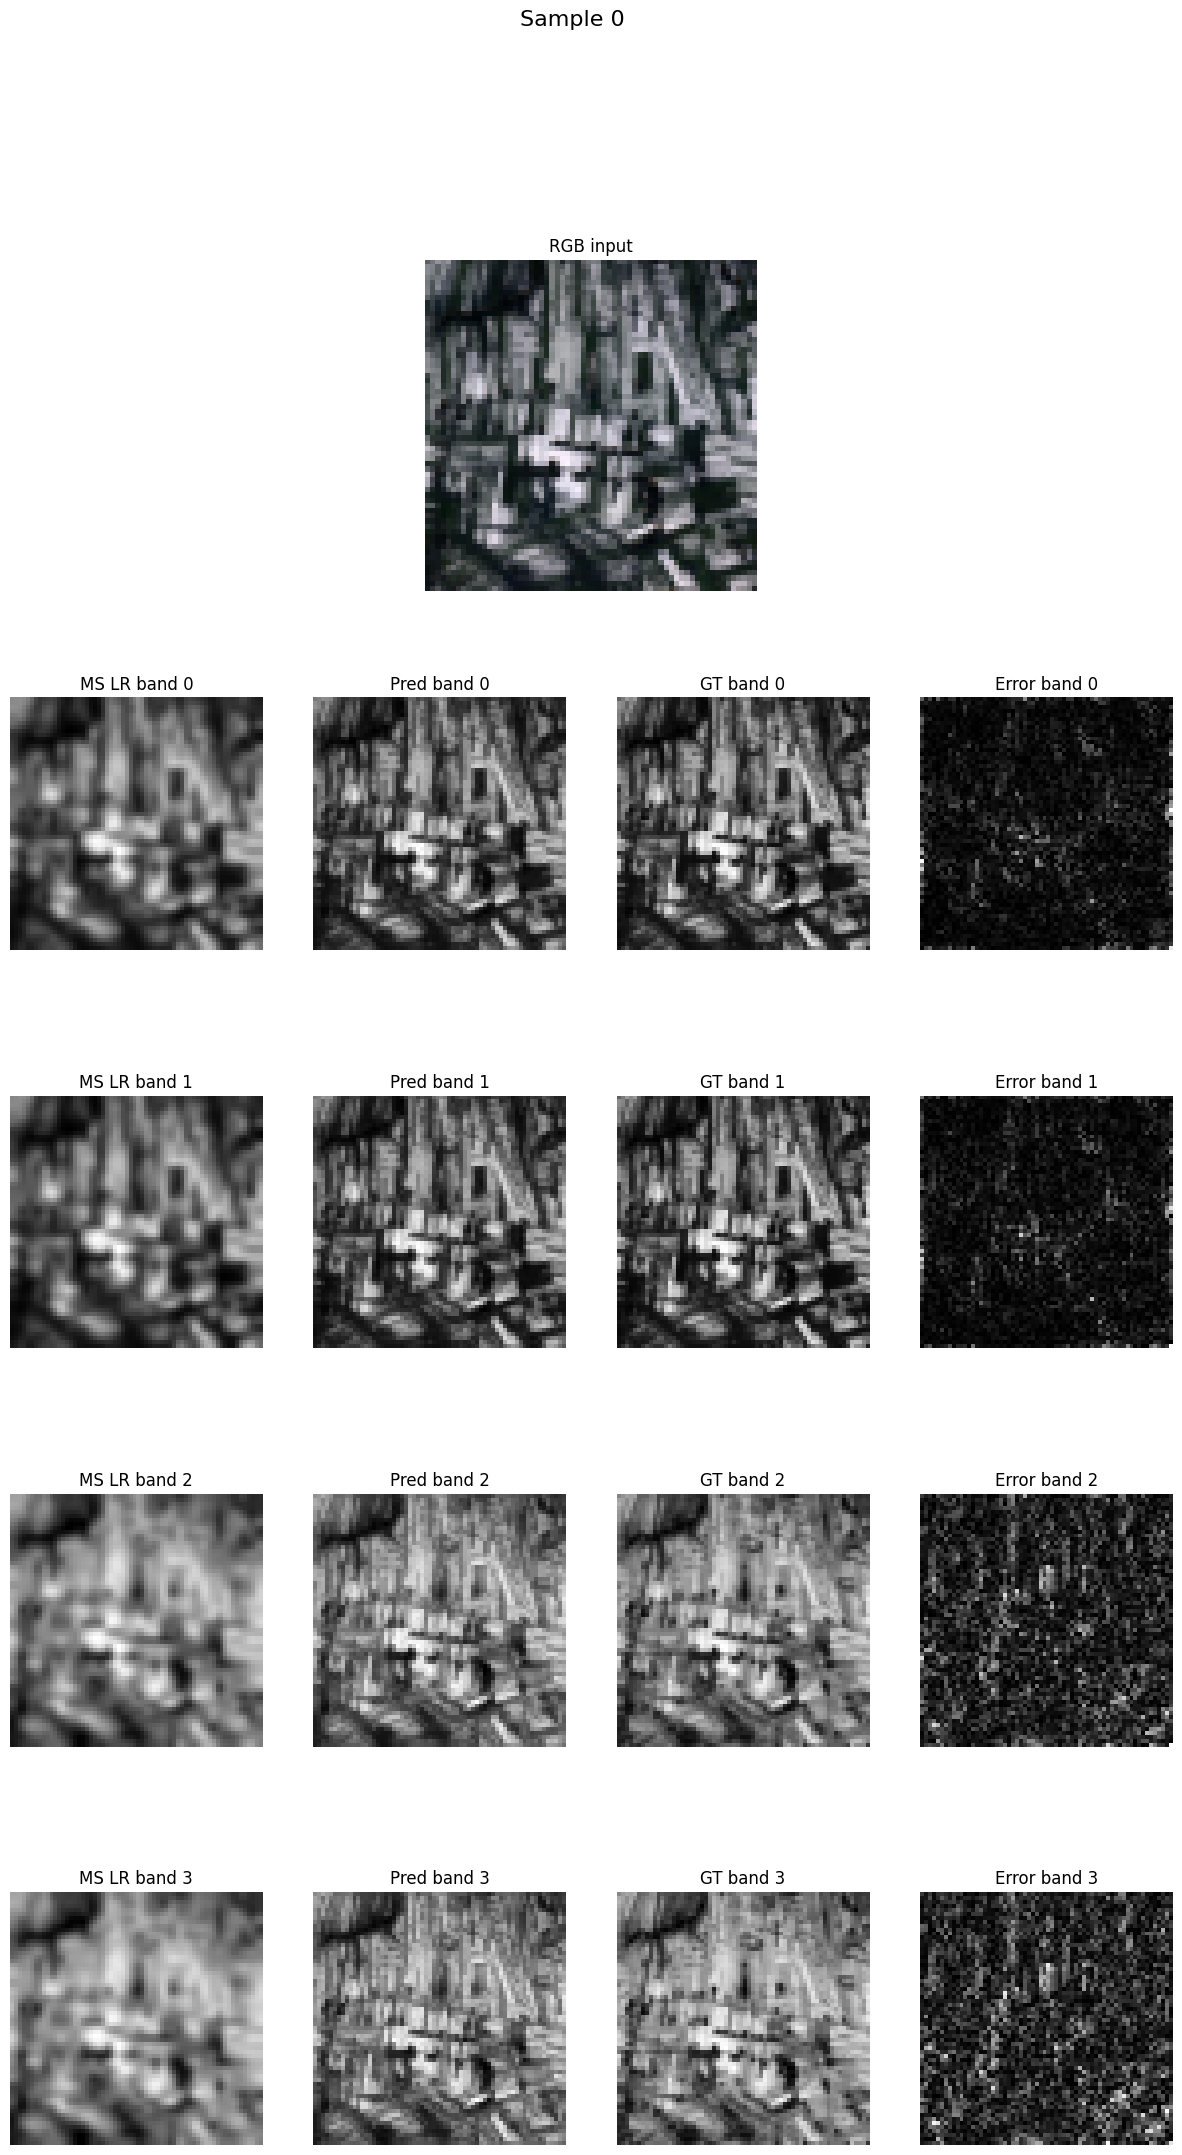

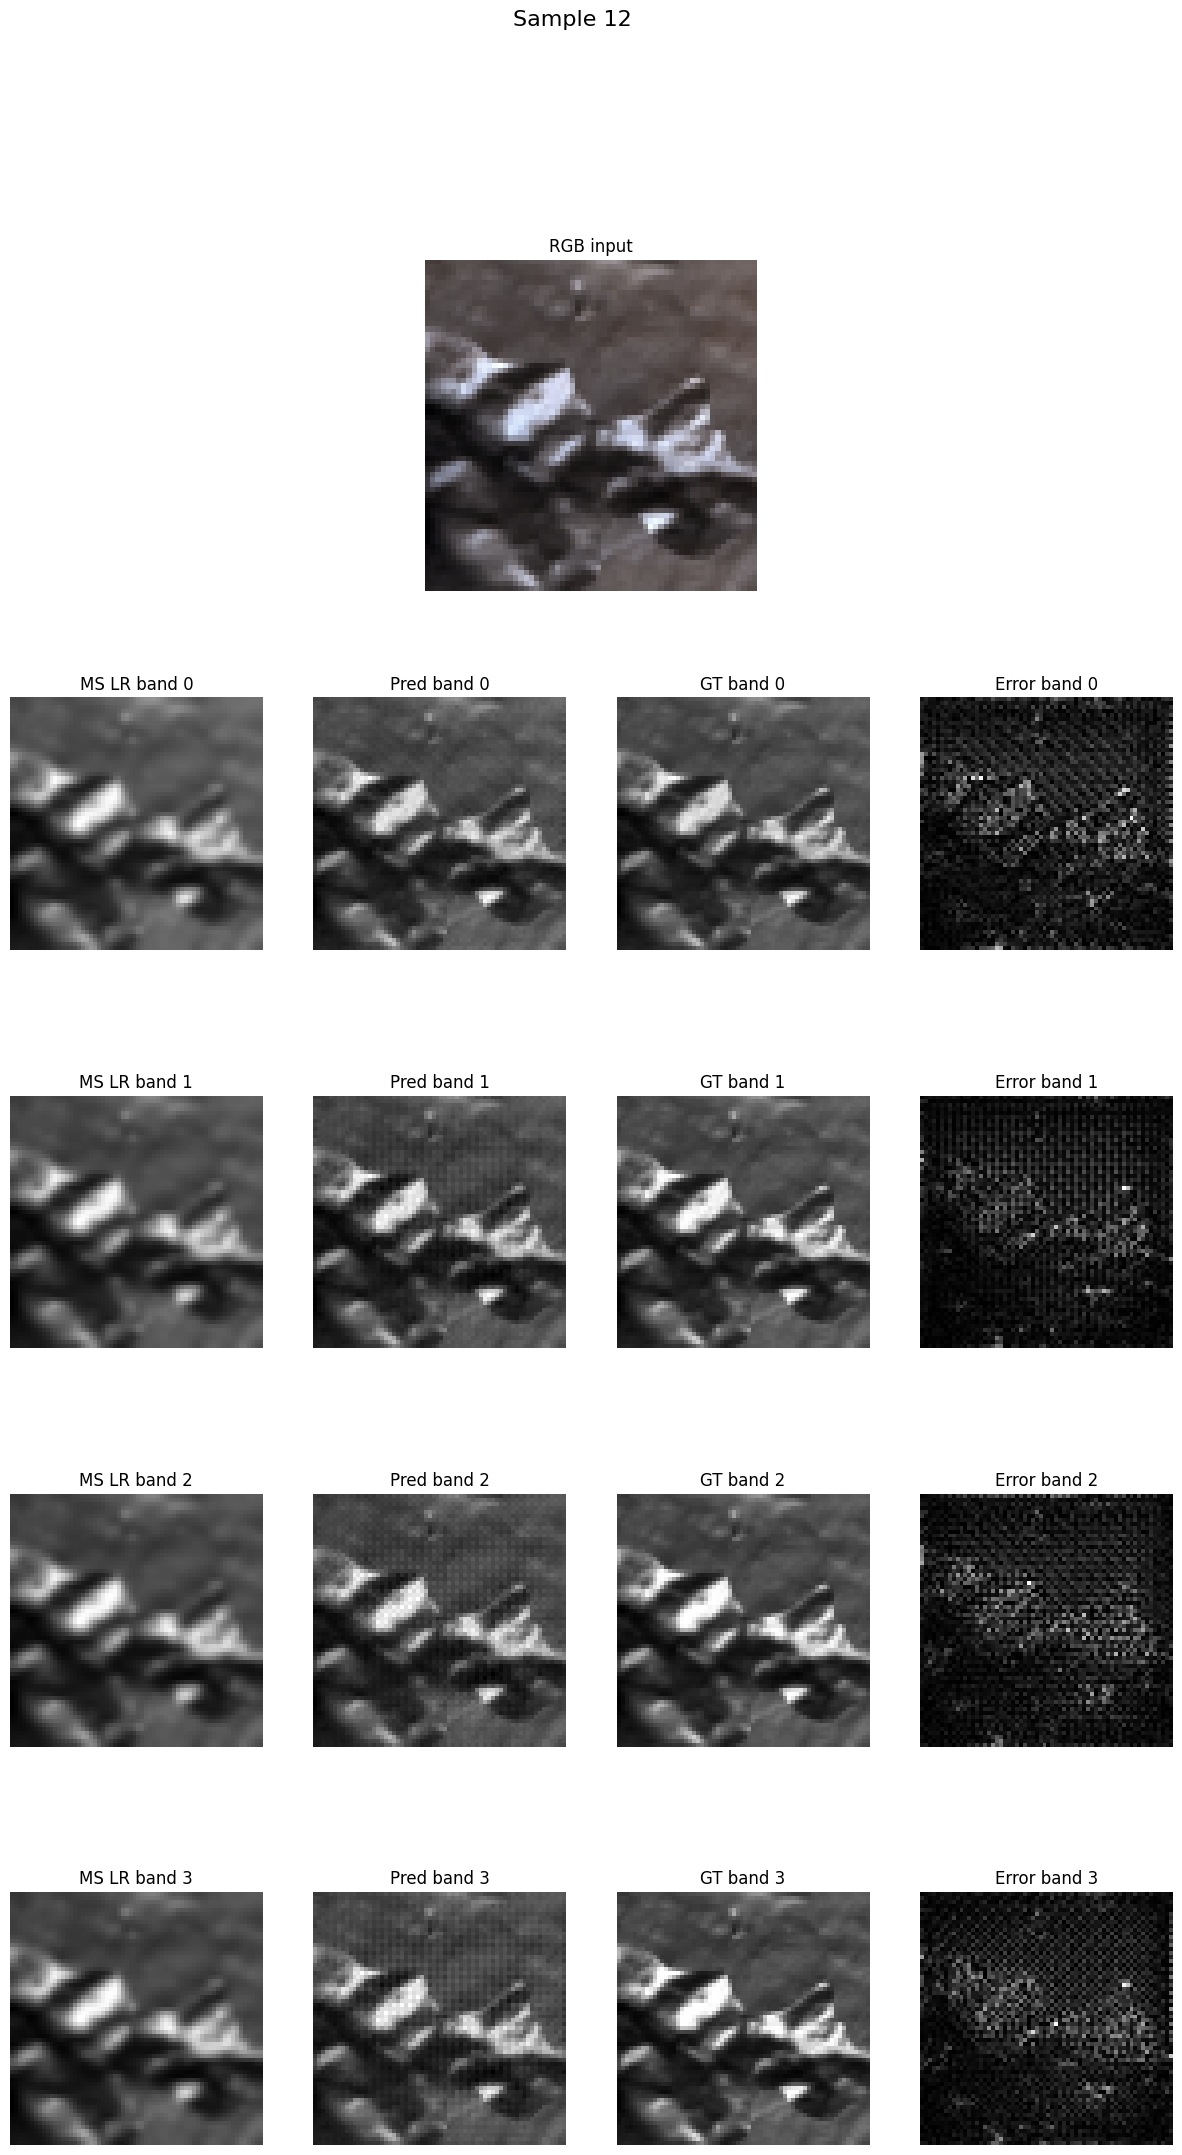

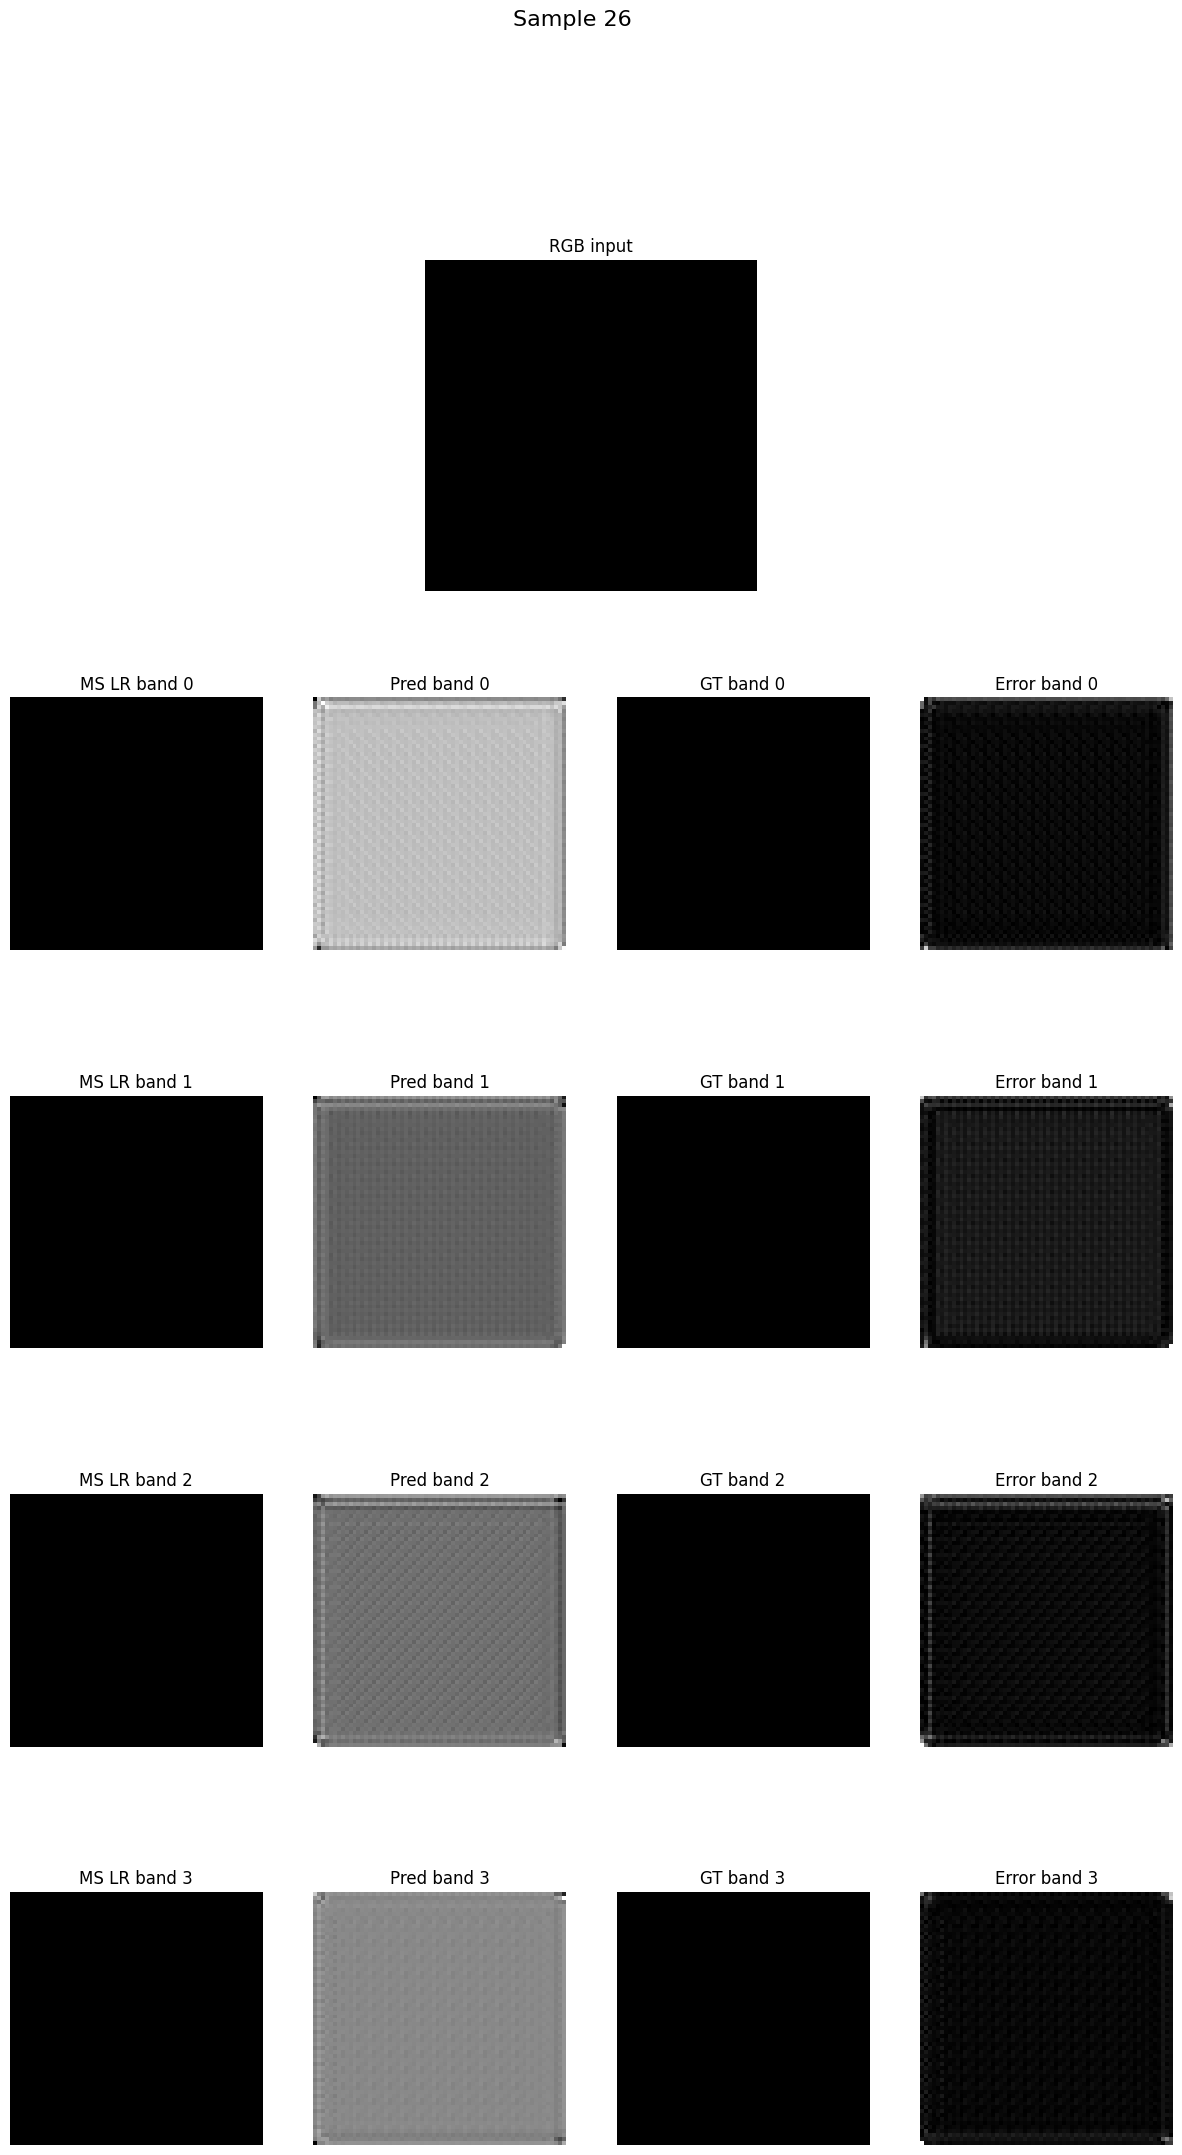

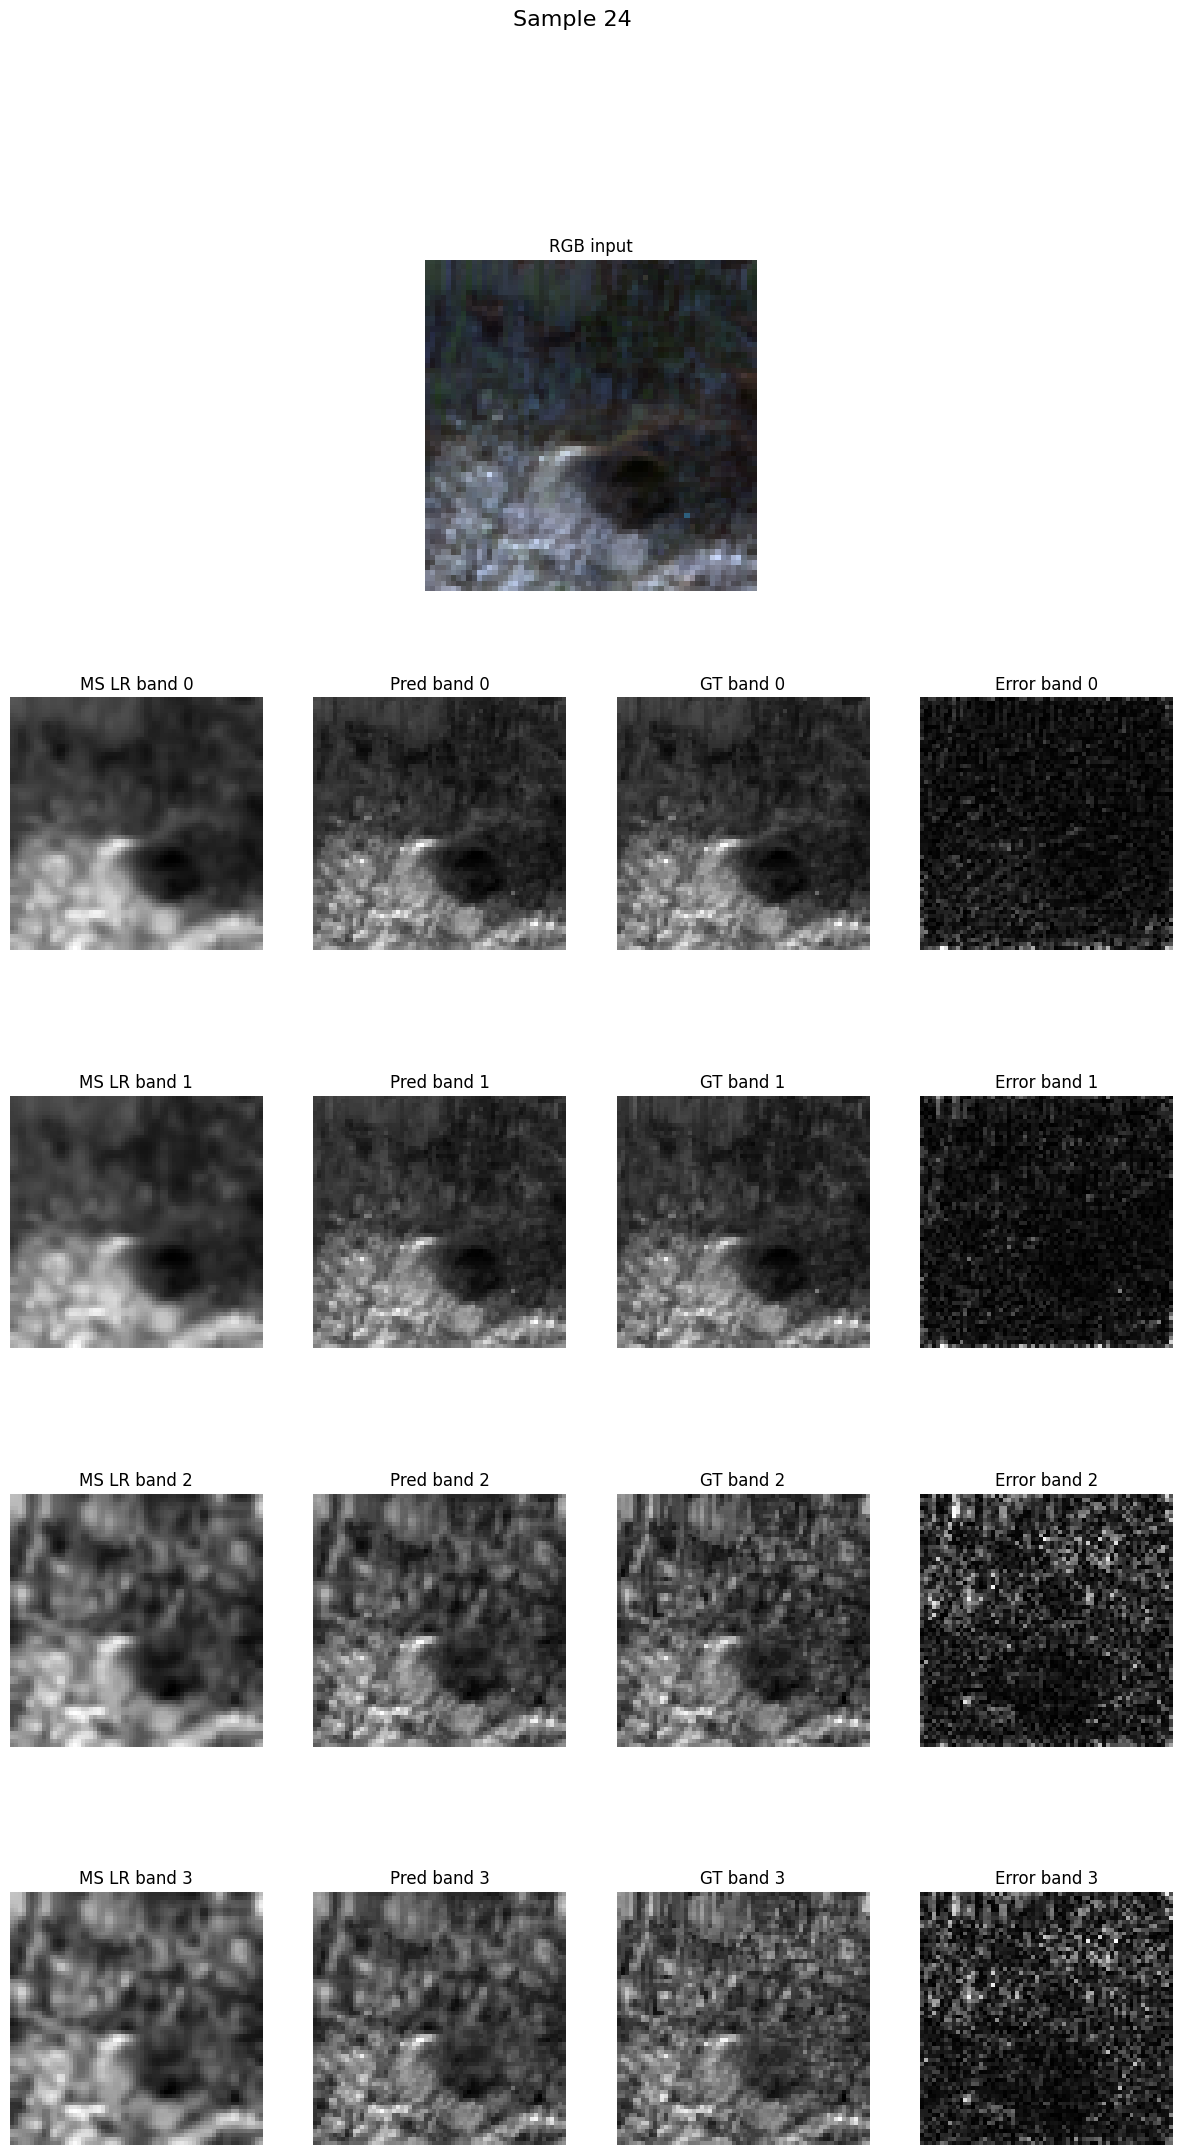

In [ ]:
model = PanSharpenUnetppLightning.load_from_checkpoint("./lightning_logs/version_1/checkpoints/pansharpen-unet-epoch=003-val_l1=0.0530.ckpt")

dataset = SentinelCroppedDataset("./dataset_sentinel")
dataloaders = dataset.produce_dataloaders() #train, val, test

plot_pansharpen_examples(
    model=model,
    test_loader=dataloaders[2],
    num_samples=5,
)